In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 29

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 29)                319       
                                                                 
Total params: 1,389
Trainable params: 1,389
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
194/200 [============================>.] - ETA: 0s - loss: 3.1472 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 2s 7ms/step - loss: 3.1395 - accuracy: 0.1183 - val_loss: 2.6582 - val_accuracy: 0.2153
Epoch 2/1000
195/200 [============================>.] - ETA: 0s - loss: 2.5167 - accuracy: 0.2216
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 5ms/step - loss: 2.5103 - accuracy: 0.2228 - val_loss: 1.8632 - val_accuracy: 0.4572
Epoch 3/1000
191/200 [===========================>..] - ETA: 0s - loss: 2.1223 - accuracy: 0.3034
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 6ms/step - loss: 2.1181 - accuracy: 0.3050 - val_loss: 1.5243 - val_accuracy: 0.5463
Epoch 4/1000
192/200 [===========================>..] - ETA: 0s - loss: 1.9569 - accu

Epoch 28/1000
198/200 [============================>.] - ETA: 0s - loss: 1.4017 - accuracy: 0.5265
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.4011 - accuracy: 0.5266 - val_loss: 0.7446 - val_accuracy: 0.8005
Epoch 29/1000
192/200 [===========================>..] - ETA: 0s - loss: 1.4130 - accuracy: 0.5249
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.4129 - accuracy: 0.5245 - val_loss: 0.7455 - val_accuracy: 0.8125
Epoch 30/1000
195/200 [============================>.] - ETA: 0s - loss: 1.3924 - accuracy: 0.5310
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.3911 - accuracy: 0.5311 - val_loss: 0.7253 - val_accuracy: 0.8024
Epoch 31/1000
200/200 [==============================] - ETA: 0s - loss: 1.4061

Epoch 55/1000
196/200 [============================>.] - ETA: 0s - loss: 1.3161 - accuracy: 0.5548
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.3160 - accuracy: 0.5549 - val_loss: 0.6473 - val_accuracy: 0.8276
Epoch 56/1000
198/200 [============================>.] - ETA: 0s - loss: 1.3170 - accuracy: 0.5539
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.3165 - accuracy: 0.5538 - val_loss: 0.6623 - val_accuracy: 0.8371
Epoch 57/1000
196/200 [============================>.] - ETA: 0s - loss: 1.3112 - accuracy: 0.5555
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.3122 - accuracy: 0.5552 - val_loss: 0.6512 - val_accuracy: 0.7990
Epoch 58/1000
198/200 [============================>.] - ETA: 0s - loss: 1.3107

Epoch 82/1000
196/200 [============================>.] - ETA: 0s - loss: 1.2809 - accuracy: 0.5671
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.2798 - accuracy: 0.5678 - val_loss: 0.6338 - val_accuracy: 0.8366
Epoch 83/1000
196/200 [============================>.] - ETA: 0s - loss: 1.2713 - accuracy: 0.5667
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.2716 - accuracy: 0.5669 - val_loss: 0.6267 - val_accuracy: 0.8403
Epoch 84/1000
198/200 [============================>.] - ETA: 0s - loss: 1.2704 - accuracy: 0.5709
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
200/200 [==============================] - 1s 7ms/step - loss: 1.2704 - accuracy: 0.5708 - val_loss: 0.6256 - val_accuracy: 0.8254
Epoch 85/1000
199/200 [============================>.] - ETA: 0s - loss: 1.2658

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

67/67 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.8167


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 97ms/step
[5.1127691e-03 1.2502964e-03 1.5022528e-03 5.0513045e-05 3.6599245e-03
 8.4774960e-03 6.1747065e-04 2.8733756e-02 2.3974907e-03 4.6675891e-06
 5.0371792e-03 2.8273763e-04 4.4017833e-02 3.3089502e-05 6.1752384e-05
 3.4170562e-01 2.5176443e-04 2.9544276e-04 2.9411332e-05 7.0349597e-05
 1.4793236e-03 8.5807706e-06 9.3393005e-02 9.7307820e-06 2.7569484e-05
 1.8578756e-01 2.4843746e-01 2.6635190e-02 6.2972814e-04]
15


# Confusion matrix

267/267 [==============================] - 1s 3ms/step


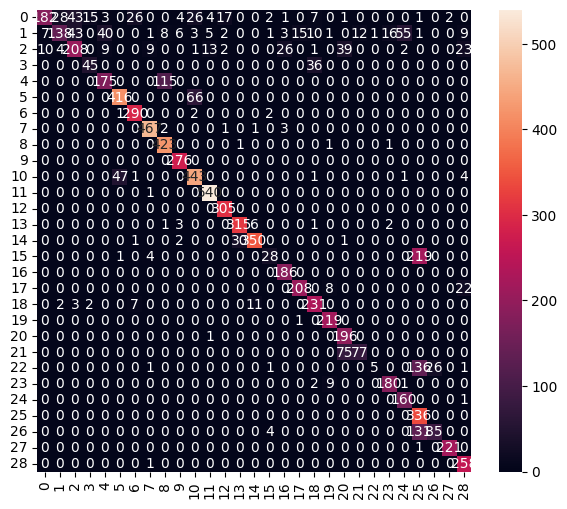

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       362
           1       0.80      0.37      0.50       377
           2       0.70      0.60      0.65       347
           3       0.73      0.56      0.63        81
           4       0.77      0.60      0.68       290
           5       0.89      0.86      0.88       482
           6       0.89      0.98      0.94       295
           7       0.96      0.99      0.97       474
           8       0.77      0.99      0.87       426
           9       0.95      1.00      0.97       276
          10       0.82      0.89      0.85       497
          11       0.96      1.00      0.98       541
          12       0.93      1.00      0.97       305
          13       0.91      0.96      0.93       328
          14       0.95      0.91      0.93       384
          15       0.74      0.11      0.19       252
          16       0.85      1.00      0.92       186
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp81tth7cz\assets


7644

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.1127691e-03 1.2502952e-03 1.5022506e-03 5.0513019e-05 3.6599215e-03
 8.4774988e-03 6.1747036e-04 2.8733710e-02 2.3974895e-03 4.6675823e-06
 5.0371788e-03 2.8273626e-04 4.4017736e-02 3.3089487e-05 6.1752369e-05
 3.4170580e-01 2.5176408e-04 2.9544244e-04 2.9411287e-05 7.0349561e-05
 1.4793213e-03 8.5807578e-06 9.3392991e-02 9.7307593e-06 2.7569473e-05
 1.8578766e-01 2.4843743e-01 2.6635198e-02 6.2972755e-04]
15
